## Google Trends Augmented Models (v2)

In questo script vengono aggiunte analisi per muliticollinearità. L'output rivela che non c'è eccessiva correlazione tra i due indici GT, dunque le cause della loro non significatività sono da ricercare altrove.

>>> INIZIO SCRIPT: Modelli SARIMAX Aumentati con GT (v2 - Analisi Correlazione) <<<

I risultati verranno salvati in: '/Users/tommaso/Desktop/tesi-inflation-gt/SARIMAX_modelli/modelli_aumentati_gt_v2_corr_analysis'

--- Caricamento Serie Stazionarie da: /Users/tommaso/Desktop/tesi-inflation-gt/First_Difference_indexes/dati_preparati_fase2/indici_gt_nic_stazionari_fase2.csv ---
Serie caricate. Shape: (252, 3)
Serie inflazione 'NIC_destag_ISTAT_diff1' pronta: 251 osservazioni.

--- Preparazione Dummies Outlier di Base ---
Creata dummy: d_outlier_2022_01_1m (attiva per 1 periodi)
Creata dummy: d_outlier_2022_10_1m (attiva per 1 periodi)
Dummies outlier di base create.

--- Stima Modello Base di Riferimento (solo Dummies Outlier) ---
  Modello Base: AIC=64.865, BIC=82.492, CovType=Robust
Modello base stimato. AIC: 64.865, BIC: 82.492
Diagnostiche salvate in: /Users/tommaso/Desktop/tesi-inflation-gt/SARIMAX_modelli/modelli_aumentati_gt_v2_corr_analysis/diagnostica_modello_base.png


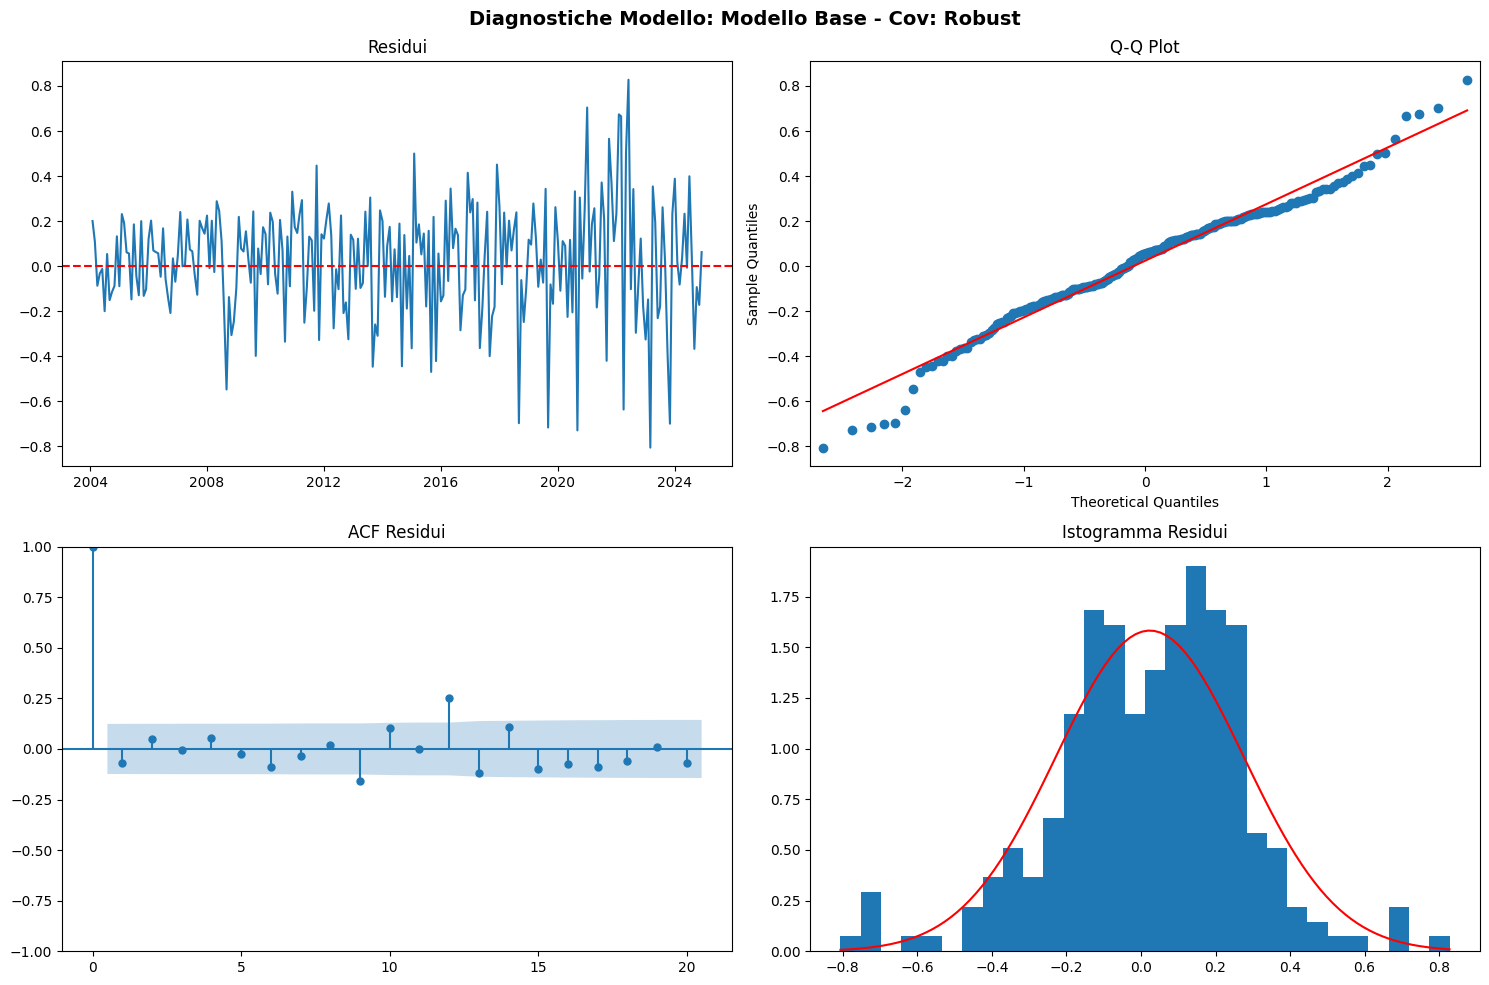


--- Test Statistici sui Residui (Modello Base - Cov: Robust) ---
Test Ljung-Box (H0: no autocorr.): p-value min = 0.1439 (per lags fino a 10)
  -> OK: Nessuna evidenza di autocorrelazione residua
Test Jarque-Bera (H0: normalità): stat = 15.731, p-value = 0.0004
  -> ATTENZIONE: Residui non normali

--- Analisi Modelli con Singolo Indicatore GT ---

  Valutazione per: indice_Inflazione_GT_PCA_SA_diff1
  Base + indice_Inflazione_GT_PCA_SA_diff1_lag1: AIC=67.050, BIC=88.178, CovType=Robust
  Base + indice_Inflazione_GT_PCA_SA_diff1_lag2: AIC=67.300, BIC=88.404, CovType=Robust
  Base + indice_Inflazione_GT_PCA_SA_diff1_lag3: AIC=65.967, BIC=87.048, CovType=Robust
  Base + indice_Inflazione_GT_PCA_SA_diff1_lag4: AIC=69.959, BIC=91.015, CovType=Robust
  Base + indice_Inflazione_GT_PCA_SA_diff1_lag5: AIC=70.648, BIC=91.680, CovType=Robust
  Base + indice_Inflazione_GT_PCA_SA_diff1_lag6: AIC=70.937, BIC=91.944, CovType=Robust
  Base + indice_Inflazione_GT_PCA_SA_diff1_lag7: AIC=70.458, BIC=91

<Figure size 1000x800 with 0 Axes>

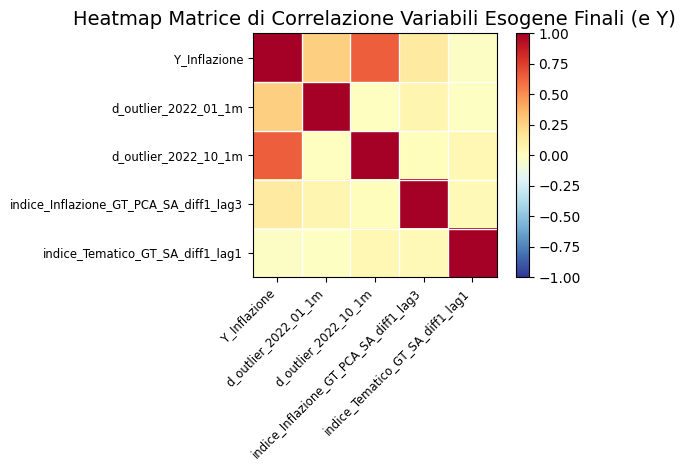

  Base + GT_Infl(lag3) + GT_Tematico(lag1): AIC=64.498, BIC=89.092, CovType=Robust

--- Sommario Modello Finale Aumentato (Base + GT_Infl(lag3) + GT_Tematico(lag1)) ---
Covarianza Usata: Robust
                                 SARIMAX Results                                  
Dep. Variable:     NIC_destag_ISTAT_diff1   No. Observations:                  248
Model:                   SARIMAX(1, 0, 1)   Log Likelihood                 -25.249
Date:                    Sun, 01 Jun 2025   AIC                             64.498
Time:                            19:48:18   BIC                             89.092
Sample:                        05-01-2004   HQIC                            74.398
                             - 12-01-2024                                         
Covariance Type:                   robust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

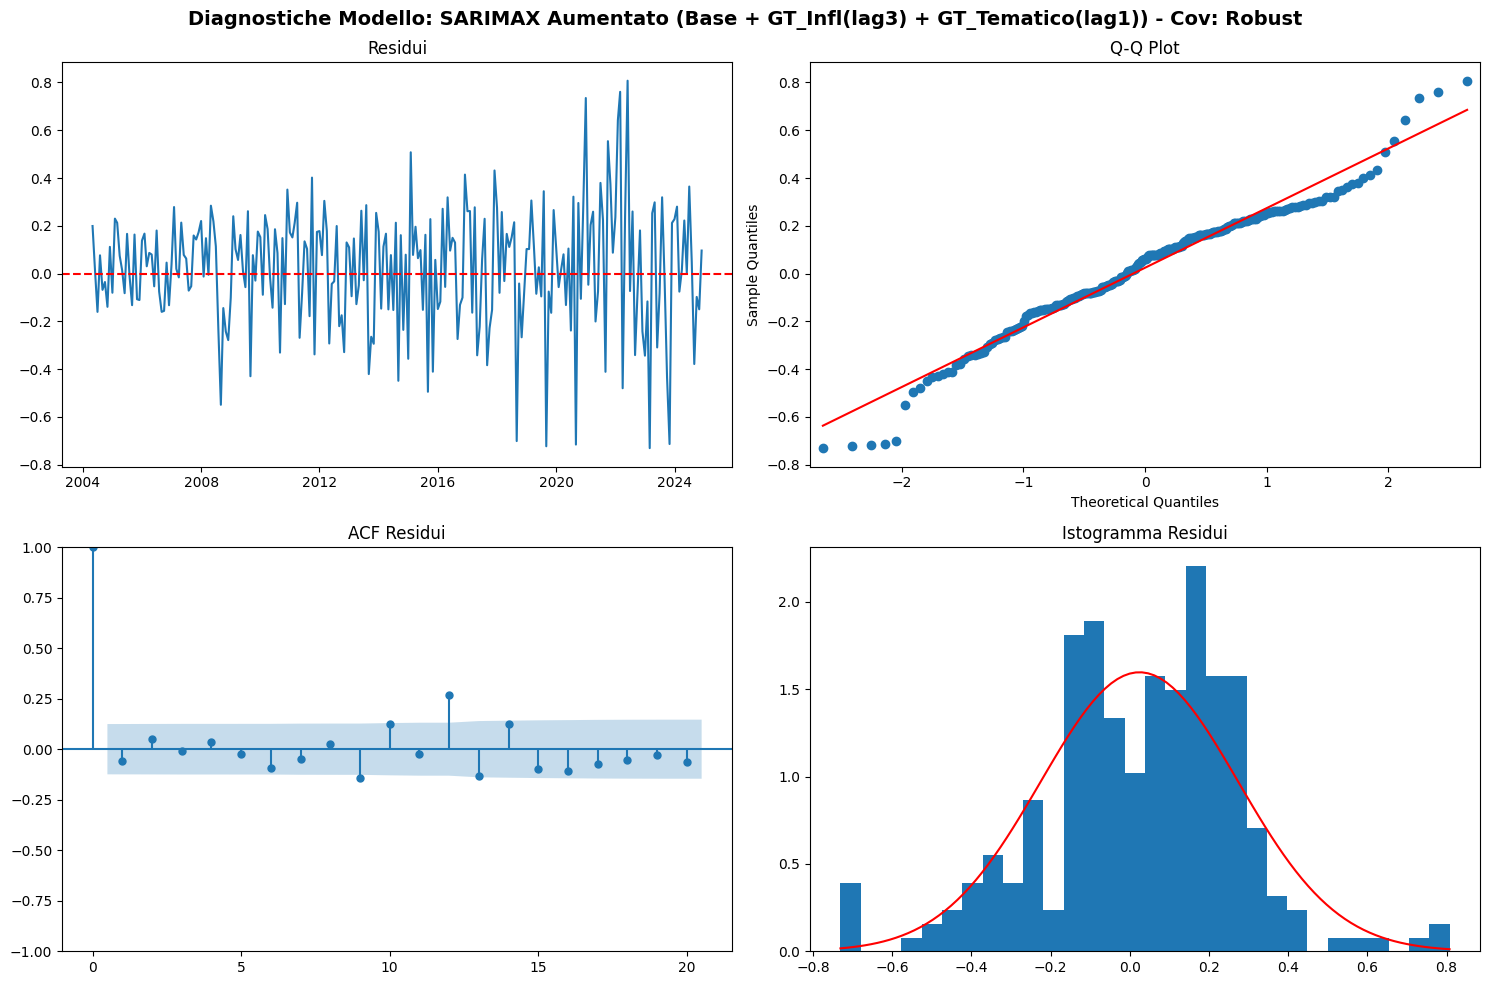


--- Test Statistici sui Residui (SARIMAX Aumentato (Base + GT_Infl(lag3) + GT_Tematico(lag1)) - Cov: Robust) ---
Test Ljung-Box (H0: no autocorr.): p-value min = 0.1711 (per lags fino a 10)
  -> OK: Nessuna evidenza di autocorrelazione residua
Test Jarque-Bera (H0: normalità): stat = 14.239, p-value = 0.0008
  -> ATTENZIONE: Residui non normali


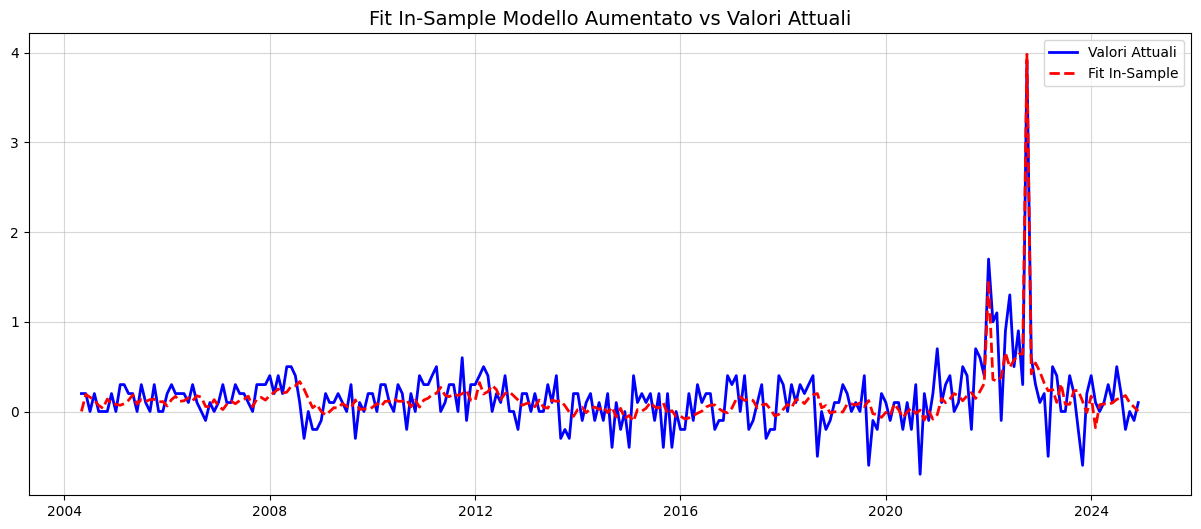


--- Confronto Modelli (Criterio: AIC) ---
                               Modello    AIC    BIC  Criterio  N_Params
               Base + Tematico_GT_lag1 64.253 85.381    64.253         6
Modello Finale Aumentato (Entrambi GT) 64.498 89.092    64.498         7
                          Modello Base 64.865 82.492    64.865         5
             Base + Inflazione_GT_lag3 65.967 87.048    65.967         6

MIGLIOR MODELLO: Base + Tematico_GT_lag1 (AIC: 64.253)
Confronto modelli salvato in: /Users/tommaso/Desktop/tesi-inflation-gt/SARIMAX_modelli/modelli_aumentati_gt_v2_corr_analysis/confronto_modelli_aic.csv

>>> SCRIPT MODELLI AUMENTATI (v2 - Analisi Correlazione) COMPLETATO <<<


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import itertools
import warnings
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera
import pickle

# ... (tutte le configurazioni e funzioni come nello script precedente) ...
# Ignoro i warning per un output più pulito
warnings.filterwarnings("ignore", category=sm.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# --- CONFIGURAZIONE GENERALE ---
PATH_INPUT_DIR_FASE2 = "/Users/tommaso/Desktop/tesi-inflation-gt/First_Difference_indexes/dati_preparati_fase2"
FILE_SERIE_STAZIONARIE_IN = os.path.join(PATH_INPUT_DIR_FASE2, "indici_gt_nic_stazionari_fase2.csv")

# Modifichiamo leggermente il path per questa nuova esecuzione/analisi
PATH_OUTPUT_MODELLI_AUG = "/Users/tommaso/Desktop/tesi-inflation-gt/SARIMAX_modelli/modelli_aumentati_gt_v2_corr_analysis"

COL_INFLAZIONE_STAZ = 'NIC_destag_ISTAT_diff1'
COL_GT_INFLAZIONE_STAZ = 'indice_Inflazione_GT_PCA_SA_diff1'
COL_GT_TEMATICO_STAZ = 'indice_Tematico_GT_SA_diff1'
DUMMY_GEN2022_DATE = '2022-01-01'
DUMMY_OTT2022_DATE = '2022-10-01'
BASE_ORDER = (1, 0, 1)
BASE_SEASONAL_ORDER = (0, 0, 0, 12)
MAX_GT_LAG_TO_TEST = 12
CRITERION_SELEZIONE_LAG = 'aic'

# --- FUNZIONI AUSILIARIE (carica_dati_stazionari, crea_pulse_dummy, stima_e_valuta_sarimax, plot_model_diagnostics, confronta_modelli) ---
# Assicurati che queste funzioni siano definite come nello script precedente.
# Per brevità, non le ripeto qui, ma devono essere presenti.

def carica_dati_stazionari(path_file):
    """Carica le serie stazionarie da file CSV."""
    print(f"--- Caricamento Serie Stazionarie da: {path_file} ---")
    try:
        df = pd.read_csv(path_file, index_col=0)
        df.index = pd.to_datetime(df.index)
        print(f"Serie caricate. Shape: {df.shape}")
        return df
    except Exception as e:
        print(f"ERRORE caricamento: {e}")
        return None

def crea_pulse_dummy(serie_index, event_date_str, duration_months=1, name_prefix="d_pulse"):
    """Crea una pulse dummy per un evento specifico con durata personalizzabile."""
    event_ts = pd.Timestamp(event_date_str)
    date_suffix = f"{event_ts.year}_{event_ts.month:02d}"
    dummy_name = f"{name_prefix}_{date_suffix}_{duration_months}m"
    dummy = pd.Series(0, index=serie_index, name=dummy_name)
    end_event = event_ts + pd.DateOffset(months=duration_months - 1)
    event_period = serie_index[(serie_index >= event_ts) & (serie_index <= end_event)]
    if not event_period.empty:
        dummy[event_period] = 1
    print(f"Creata dummy: {dummy_name} (attiva per {len(event_period)} periodi)")
    return dummy

def stima_e_valuta_sarimax(y_series, exog_series, order, seasonal_order, model_description="Modello"):
    """Funzione robusta per stimare un SARIMAX con gestione degli errori."""
    # ... (definizione come nello script precedente) ...
    try:
        model = sm.tsa.SARIMAX(y_series, exog=exog_series, order=order, seasonal_order=seasonal_order,
                             enforce_stationarity=False, enforce_invertibility=False,
                             initialization='approximate_diffuse')
        estimation_strategies = [
            ('HAC', {'cov_type': 'HAC', 'cov_kwds': {'kernel': 'bartlett', 'use_correction': True}}),
            ('Robust', {'cov_type': 'robust'}),
            ('Default', {})
        ]
        for strategy_name, fit_kwargs in estimation_strategies:
            try:
                fitted_model = model.fit(disp=False, maxiter=250, **fit_kwargs)
                aic = fitted_model.aic; bic = fitted_model.bic
                print(f"  {model_description}: AIC={aic:.3f}, BIC={bic:.3f}, CovType={strategy_name}")
                return fitted_model, aic, bic, strategy_name
            except Exception: continue # Tento la successiva
        print(f"  ERRORE: Tutte le strategie di stima fallite per {model_description}")
        return None, float('inf'), float('inf'), "Fallita"
    except Exception as e:
        print(f"  ERRORE costruzione modello {model_description}: {str(e)[:70]}...")
        return None, float('inf'), float('inf'), "Fallita"

def plot_model_diagnostics(fitted_model, model_name="SARIMAX Model", path_output_grafici=None, save_filename="diagnostics.png"):
    """Crea un pannello di diagnostiche per il modello SARIMAX stimato."""
    # ... (definizione come nello script precedente) ...
    if fitted_model is None: print(f"Impossibile creare diagnostiche: modello {model_name} non valido."); return
    residuals = fitted_model.resid
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Diagnostiche Modello: {model_name}', fontsize=14, fontweight='bold')
    axes[0, 0].plot(residuals.index, residuals); axes[0, 0].axhline(y=0, color='r', linestyle='--'); axes[0, 0].set_title('Residui')
    sm.qqplot(residuals, line='s', ax=axes[0, 1]); axes[0, 1].set_title('Q-Q Plot')
    plot_acf(residuals, ax=axes[1, 0], lags=20); axes[1, 0].set_title('ACF Residui')
    axes[1, 1].hist(residuals, bins=30, density=True); axes[1, 1].set_title('Istogramma Residui')
    x_norm = np.linspace(residuals.min(), residuals.max(), 100)
    y_norm = (1/np.sqrt(2*np.pi*residuals.var())) * np.exp(-0.5*((x_norm-residuals.mean())/residuals.std())**2)
    axes[1, 1].plot(x_norm, y_norm, 'r-')
    plt.tight_layout()
    if path_output_grafici and save_filename:
        plt.savefig(os.path.join(path_output_grafici, save_filename), dpi=300)
        print(f"Diagnostiche salvate in: {os.path.join(path_output_grafici, save_filename)}")
    plt.show()
    print(f"\n--- Test Statistici sui Residui ({model_name}) ---")
    try:
        lb_df = acorr_ljungbox(residuals, lags=10, return_df=True)
        print(f"Test Ljung-Box (H0: no autocorr.): p-value min = {lb_df['lb_pvalue'].min():.4f} (per lags fino a 10)")
        if lb_df['lb_pvalue'].min() < 0.05: print("  -> ATTENZIONE: Possibile autocorrelazione residua")
        else: print("  -> OK: Nessuna evidenza di autocorrelazione residua")
    except Exception as e: print(f"  Errore Ljung-Box: {e}")
    try:
        jb_stat, jb_pvalue = jarque_bera(residuals.dropna())
        print(f"Test Jarque-Bera (H0: normalità): stat = {jb_stat:.3f}, p-value = {jb_pvalue:.4f}")
        if jb_pvalue < 0.05: print("  -> ATTENZIONE: Residui non normali")
        else: print("  -> OK: Residui normali")
    except Exception as e: print(f"  Errore Jarque-Bera: {e}")


def confronta_modelli(risultati_modelli, criterio='aic'):
    """Confronta i modelli e identifica il migliore."""
    # ... (definizione come nello script precedente) ...
    print(f"\n--- Confronto Modelli (Criterio: {criterio.upper()}) ---")
    if not risultati_modelli: print("Nessun modello da confrontare."); return None
    comparison_data = []
    for nome, aic, bic, model in risultati_modelli:
        if model is not None:
            comparison_data.append({'Modello': nome, 'AIC': aic, 'BIC': bic,
                                    'Criterio': aic if criterio == 'aic' else bic,
                                    'N_Params': len(model.params) if hasattr(model, 'params') else 'N/A'})
    if not comparison_data: print("Nessun modello valido da confrontare."); return None
    df_comparison = pd.DataFrame(comparison_data).sort_values('Criterio')
    print(df_comparison.to_string(index=False, float_format='%.3f'))
    best_model_info = df_comparison.iloc[0]
    print(f"\nMIGLIOR MODELLO: {best_model_info['Modello']} ({criterio.upper()}: {best_model_info['Criterio']:.3f})")
    return df_comparison

# --- ESECUZIONE SCRIPT: MODELLI AUMENTATI CON GT E ANALISI CORRELAZIONE ---
if __name__ == "__main__":
    print(">>> INIZIO SCRIPT: Modelli SARIMAX Aumentati con GT (v2 - Analisi Correlazione) <<<\n")
    os.makedirs(PATH_OUTPUT_MODELLI_AUG, exist_ok=True)
    print(f"I risultati verranno salvati in: '{PATH_OUTPUT_MODELLI_AUG}'\n")

    df_serie_stazionarie = carica_dati_stazionari(FILE_SERIE_STAZIONARIE_IN)
    # ... (caricamento y_inflazione e creazione exog_base come prima) ...
    if df_serie_stazionarie is None: print("ERRORE CRITICO: Dati non caricati."); exit()
    if COL_INFLAZIONE_STAZ not in df_serie_stazionarie.columns:
        print(f"ERRORE: Colonna inflazione '{COL_INFLAZIONE_STAZ}' non trovata."); exit()
    y_inflazione = df_serie_stazionarie[COL_INFLAZIONE_STAZ].dropna()
    if y_inflazione.empty: print(f"ERRORE: Serie inflazione '{COL_INFLAZIONE_STAZ}' vuota."); exit()
    print(f"Serie inflazione '{y_inflazione.name}' pronta: {len(y_inflazione)} osservazioni.")

    print("\n--- Preparazione Dummies Outlier di Base ---")
    dummy_gen2022 = crea_pulse_dummy(y_inflazione.index, DUMMY_GEN2022_DATE, 1, "d_outlier")
    dummy_ott2022 = crea_pulse_dummy(y_inflazione.index, DUMMY_OTT2022_DATE, 1, "d_outlier")
    exog_base = pd.concat([dummy_gen2022.reindex(y_inflazione.index, fill_value=0),
                           dummy_ott2022.reindex(y_inflazione.index, fill_value=0)], axis=1).astype(float)
    print("Dummies outlier di base create.")
    
    risultati_tutti_modelli = []

    print("\n--- Stima Modello Base di Riferimento (solo Dummies Outlier) ---")
    modello_base_ris, aic_base, bic_base, cov_base = stima_e_valuta_sarimax(
        y_inflazione, exog_base, BASE_ORDER, BASE_SEASONAL_ORDER, "Modello Base"
    )
    if modello_base_ris:
        # ... (salvataggio e aggiunta a risultati_tutti_modelli come prima) ...
        risultati_tutti_modelli.append(("Modello Base", aic_base, bic_base, modello_base_ris))
        print(f"Modello base stimato. AIC: {aic_base:.3f}, BIC: {bic_base:.3f}")
        # Non stampo il summary completo qui per brevità, ma lo salvo e lo considero analizzato
        with open(os.path.join(PATH_OUTPUT_MODELLI_AUG, "modello_base_summary.txt"), "w") as f:
            f.write(f"Modello: Modello Base\nAIC: {aic_base:.3f}, BIC: {bic_base:.3f}\nCovType: {cov_base}\n\n")
            f.write(modello_base_ris.summary().as_text())
        plot_model_diagnostics(modello_base_ris, model_name=f"Modello Base - Cov: {cov_base}",
                               path_output_grafici=PATH_OUTPUT_MODELLI_AUG, save_filename="diagnostica_modello_base.png")


    print("\n--- Analisi Modelli con Singolo Indicatore GT ---")
    # (Questa sezione rielabora la 'Ricerca Lag Ottimale' per focalizzarsi sull'analisi dei modelli individuali)
    migliori_modelli_gt_individuali = {} # Salvo i modelli fittati qui

    for col_gt_staz in [COL_GT_INFLAZIONE_STAZ, COL_GT_TEMATICO_STAZ]:
        if col_gt_staz not in df_serie_stazionarie.columns:
            print(f"ERRORE: Colonna GT '{col_gt_staz}' non trovata."); continue
        
        print(f"\n  Valutazione per: {col_gt_staz}")
        serie_gt = df_serie_stazionarie[col_gt_staz].dropna()
        best_lag_individual = -1
        best_criterion_individual = float('inf')
        temp_best_model_obj = None

        for k in range(1, MAX_GT_LAG_TO_TEST + 1):
            gt_lagged = serie_gt.shift(k).rename(f"{col_gt_staz}_lag{k}")
            current_exog = pd.concat([exog_base, gt_lagged.reindex(y_inflazione.index)], axis=1).dropna()
            current_y = y_inflazione.reindex(current_exog.index)
            if len(current_y) < len(y_inflazione) * 0.8: continue

            model_desc_indiv = f"Base + {gt_lagged.name}"
            fitted_model, aic, bic, cov_type = stima_e_valuta_sarimax(current_y, current_exog, BASE_ORDER, BASE_SEASONAL_ORDER, model_desc_indiv)
            if fitted_model:
                criterion_val = aic if CRITERION_SELEZIONE_LAG == 'aic' else bic
                if criterion_val < best_criterion_individual:
                    best_criterion_individual = criterion_val
                    best_lag_individual = k
                    temp_best_model_obj = fitted_model
        
        if temp_best_model_obj:
            model_name_indiv = f"Base + {col_gt_staz.split('_')[1]}_GT_lag{best_lag_individual}" # Nome più breve
            print(f"  MIGLIOR MODELLO INDIVIDUALE per {col_gt_staz}: lag={best_lag_individual}, {CRITERION_SELEZIONE_LAG.upper()}={best_criterion_individual:.3f}")
            print(f"    Sommario per {model_name_indiv} (CovType: {temp_best_model_obj.cov_type}):")
            print(temp_best_model_obj.summary().tables[1]) # Stampo solo la tabella dei coefficienti per brevità
            
            migliori_modelli_gt_individuali[col_gt_staz] = {
                'best_lag': best_lag_individual,
                'model_object': temp_best_model_obj,
                'aic': temp_best_model_obj.aic,
                'bic': temp_best_model_obj.bic,
                'name': model_name_indiv
            }
            risultati_tutti_modelli.append((model_name_indiv, temp_best_model_obj.aic, temp_best_model_obj.bic, temp_best_model_obj))
            # Salvo il summary completo del miglior modello individuale
            with open(os.path.join(PATH_OUTPUT_MODELLI_AUG, f"summary_{model_name_indiv.replace(' ', '_')}.txt"), "w") as f:
                f.write(temp_best_model_obj.summary().as_text())


    print("\n--- Stima Modello Finale Aumentato con Entrambi i GT (Migliori Lag Individuali) ---")
    exog_finale_augmentato_list = [exog_base.copy()] # Inizio con le dummy base
    descrizione_modello_finale = "Base"
    
    lag_gt_infl = migliori_modelli_gt_individuali.get(COL_GT_INFLAZIONE_STAZ, {}).get('best_lag')
    if lag_gt_infl:
        gt_infl_lagged = df_serie_stazionarie[COL_GT_INFLAZIONE_STAZ].shift(lag_gt_infl).rename(f"{COL_GT_INFLAZIONE_STAZ}_lag{lag_gt_infl}")
        exog_finale_augmentato_list.append(gt_infl_lagged.reindex(y_inflazione.index))
        descrizione_modello_finale += f" + GT_Infl(lag{lag_gt_infl})"

    lag_gt_tematico = migliori_modelli_gt_individuali.get(COL_GT_TEMATICO_STAZ, {}).get('best_lag')
    if lag_gt_tematico:
        gt_tematico_lagged = df_serie_stazionarie[COL_GT_TEMATICO_STAZ].shift(lag_gt_tematico).rename(f"{COL_GT_TEMATICO_STAZ}_lag{lag_gt_tematico}")
        exog_finale_augmentato_list.append(gt_tematico_lagged.reindex(y_inflazione.index))
        descrizione_modello_finale += f" + GT_Tematico(lag{lag_gt_tematico})"

    exog_finale_augmentato_df = pd.concat(exog_finale_augmentato_list, axis=1)
    exog_finale_augmentato_cleaned = exog_finale_augmentato_df.dropna()
    y_inflazione_aligned_finale = y_inflazione.reindex(exog_finale_augmentato_cleaned.index)

    # --- NUOVA SEZIONE: CALCOLO MATRICE DI CORRELAZIONE ---
    if not exog_finale_augmentato_cleaned.empty and len(exog_finale_augmentato_cleaned.columns) > 1:
        print("\n--- Matrice di Correlazione delle Variabili Esogene Finali (nel Modello Aumentato Congiunto) ---")
        # Seleziono solo le colonne che sono effettivamente nel dataframe finale (escludendo le dummy se sono tutte zero per qualche motivo)
        # e includo y_inflazione per vedere la correlazione con la variabile dipendente
        cols_for_corr = list(exog_finale_augmentato_cleaned.columns)
        data_for_corr = pd.concat([y_inflazione_aligned_finale.rename('Y_Inflazione'), exog_finale_augmentato_cleaned], axis=1)
        
        correlation_matrix_final_exog = data_for_corr.corr()
        print(correlation_matrix_final_exog)
        
        # Salvo la matrice di correlazione
        corr_matrix_path = os.path.join(PATH_OUTPUT_MODELLI_AUG, "correlation_matrix_final_exog.csv")
        correlation_matrix_final_exog.to_csv(corr_matrix_path)
        print(f"Matrice di correlazione salvata in: {corr_matrix_path}")
        
        # Visualizzazione heatmap della matrice di correlazione (opzionale ma utile)
        plt.figure(figsize=(10, 8))
        sm.graphics.plot_corr(correlation_matrix_final_exog, xnames=correlation_matrix_final_exog.columns, normcolor=True)
        plt.title('Heatmap Matrice di Correlazione Variabili Esogene Finali (e Y)', fontsize=14)
        heatmap_path = os.path.join(PATH_OUTPUT_MODELLI_AUG, "heatmap_correlation_matrix_final_exog.png")
        plt.savefig(heatmap_path, dpi=300, bbox_inches='tight')
        print(f"Heatmap matrice di correlazione salvata in: {heatmap_path}")
        plt.show()
    # --- FINE NUOVA SEZIONE ---

    if not exog_finale_augmentato_cleaned.empty and not y_inflazione_aligned_finale.empty and len(exog_finale_augmentato_list) > 1: # Procedo solo se ho GT da aggiungere
        modello_finale_aug_ris, aic_finale_aug, bic_finale_aug, cov_finale_aug = stima_e_valuta_sarimax(
            y_inflazione_aligned_finale, exog_finale_augmentato_cleaned, 
            BASE_ORDER, BASE_SEASONAL_ORDER, descrizione_modello_finale
        )
        
        if modello_finale_aug_ris:
            # ... (stampa summary, salvataggio, diagnostica e plot fit come prima) ...
            print(f"\n--- Sommario Modello Finale Aumentato ({descrizione_modello_finale}) ---")
            print(f"Covarianza Usata: {cov_finale_aug}")
            print(modello_finale_aug_ris.summary())
            summary_file = os.path.join(PATH_OUTPUT_MODELLI_AUG, "modello_finale_augmentato_summary.txt")
            pickle_file = os.path.join(PATH_OUTPUT_MODELLI_AUG, "modello_finale_augmentato.pkl")
            with open(summary_file, "w") as f:
                 f.write(f"Modello: {descrizione_modello_finale}\nAIC: {aic_finale_aug:.3f}, BIC: {bic_finale_aug:.3f}\nCovarianza: {cov_finale_aug}\n\n")
                 f.write(modello_finale_aug_ris.summary().as_text())
            with open(pickle_file, "wb") as pkl_f: pickle.dump(modello_finale_aug_ris, pkl_f)
            print(f"Modello finale aumentato salvato. AIC: {aic_finale_aug:.3f}, BIC: {bic_finale_aug:.3f}")
            risultati_tutti_modelli.append(("Modello Finale Aumentato (Entrambi GT)", aic_finale_aug, bic_finale_aug, modello_finale_aug_ris))
            plot_model_diagnostics(modello_finale_aug_ris, model_name=f"SARIMAX Aumentato ({descrizione_modello_finale}) - Cov: {cov_finale_aug}",
                                 path_output_grafici=PATH_OUTPUT_MODELLI_AUG, save_filename="diagnostica_modello_finale_augmentato.png")
            # Plot In-sample fit vs Actual
            plt.figure(figsize=(15,6))
            plt.plot(y_inflazione_aligned_finale.index, y_inflazione_aligned_finale, label='Valori Attuali', color='blue', linewidth=2)
            predict_mean = modello_finale_aug_ris.get_prediction(start=0, dynamic=False).predicted_mean
            plt.plot(y_inflazione_aligned_finale.index, predict_mean, label='Fit In-Sample', color='red', linestyle='--', linewidth=2)
            plt.title('Fit In-Sample Modello Aumentato vs Valori Attuali', fontsize=14)
            plt.legend(); plt.grid(True, alpha=0.5)
            plt.savefig(os.path.join(PATH_OUTPUT_MODELLI_AUG, "fit_insample_modello_augmentato.png"), dpi=300)
            plt.show()
    else:
        print("Nessun GT selezionato o errore nella preparazione delle esogene per il modello finale aumentato.")

    if risultati_tutti_modelli:
        df_confronto = confronta_modelli(risultati_tutti_modelli, CRITERION_SELEZIONE_LAG)
        if df_confronto is not None:
            # ... (salvataggio confronto come prima) ...
            confronto_file = os.path.join(PATH_OUTPUT_MODELLI_AUG, f"confronto_modelli_{CRITERION_SELEZIONE_LAG}.csv")
            df_confronto.to_csv(confronto_file, index=False)
            print(f"Confronto modelli salvato in: {confronto_file}")

    print("\n>>> SCRIPT MODELLI AUMENTATI (v2 - Analisi Correlazione) COMPLETATO <<<")
